In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
# windows 10
# font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgunsl.ttf").get_name()
rc('font', family=font_name)           # 맑은 고딕 폰트 지정
plt.rcParams["font.size"] = 12         # 글자 크기
# plt.rcParams["figure.figsize"] = (10, 4) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

# Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령
%matplotlib inline  

<class 'numpy.ndarray'>


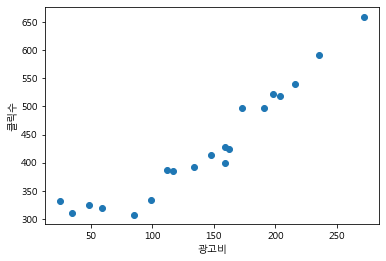

In [39]:
# skiprows=1: 첫번재 행 skip 
train = np.loadtxt('click.csv', delimiter=',', dtype='int', skiprows=1) 
print(type(train)) # <class 'numpy.ndarray'>
train_x = train[:, 0] # 모든행 0열
train_y = train[:, 1] # 모든행 1열

plt.plot(train_x, train_y, 'o')
plt.xlabel('광고비')
plt.ylabel('클릭수')
plt.show()

In [40]:
# 표준화: 정규 분포를 표준 정규분포로 변환하는 일, TOEIC ~ TOEFL의 비교
# z = 요소(x) - 평균(μ) / 표준편차(σ)
# z값은 표준 정규분포에서 사용 가능
# 표준 정규 분포: 평균 0, 표준편차가 1인 분포
# 표준 정규 분포표를 만들어 값 비교를 할 수 있도록 지원
m = train_x.mean()
std = train_x.std()
def standardize(x):
    return (x - m) / std 

In [41]:
print(train_x)

[235 216 148  35  85 204  49  25 173 191 134  99 117 112 162 272 159 159
  59 198]


In [42]:
train_z = standardize(train_x)
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


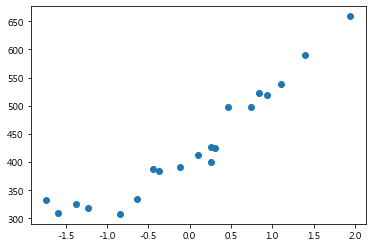

In [43]:
plt.plot(train_z, train_y, 'o')
plt.show()

In [44]:
print(train_z.size)
print(np.ones(train_z.size)) ## 데이터의 갯수만큼 0으로 초기화된 배열 생성
print(train_z)
print(train_z**2)
print(1.39433428 * 1.39433428)

20
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]
[1.94416809 1.23363286 0.00912851 2.53252924 0.71395842 0.8677792
 1.91100592 3.02996185 0.21973506 0.54386856 0.01287263 0.4044448
 0.13486842 0.19526458 0.09274711 3.78961632 0.06747433 0.06747433
 1.52054807 0.70892169]
1.9441680843831186


In [45]:
# 학습 데이터 행렬을 만든다. 전치행렬, 변수가 3개가 되도록 생성
# vstack: 열 방향 결합
# T: 배열의 열을 행으로 변환, 전치 행렬로 변환
def to_matrix(x):
    # return np.vstack([np.ones(x.size), x, x ** 2]) # 열방향으로 데이터가 발생함, 3행. 
    return np.vstack([np.ones(x.size), x, x ** 2]).T # 행방향으로 데이터 나열

In [46]:
x = to_matrix(train_z)
print(x)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


In [47]:
np.random.seed(0)
# 변수가 3개이면 기울기도 3개
# 변수가 3개인경우의 다중회귀 공식: f(x) = ax + bx + cx + d
# 여기서는 d를 생략할것임.
cust = np.random.rand(3) 
print(cust)
print(cust.shape)

[0.5488135  0.71518937 0.60276338]
(3,)


In [48]:
def f(x):
    return np.dot(x, cust) # 행렬의 곱, 내적합

In [49]:
# 오차 함수: 선형회귀 값과 실제값의 차이(잔차), 편차의 합은 0
def E(x, y): # 데이터, 실제값
    return np.sum((y - f(x))**2)

In [50]:
ETA = 0.01 # 학습률, 오차를 감소시키는 비율
diff = 1     # 학습을 반복할때의 이전 학습과의 차이값
count = 0  # 학습 진행 횟수 

In [51]:
# 데이터 확인
for line in train[0:5]:
    print(line)

[235 591]
[216 539]
[148 413]
[ 35 310]
[ 85 308]


In [52]:
print(x[0], '-->', train_y[0])
e = E(x, train_y)
print('오차:', e)

[1.         1.39433428 1.94416809] --> 591
오차: 3854351.463611686


In [53]:
# 학습을하여 a, b 값을 찾음
while diff > 0.01: # 학습에 따른 이전 학습과의 오차의 감소값
    print('cust 기울기 3개의 감소값: ', ETA * np.dot(f(x) - train_y, x))
    cust = cust - ETA * np.dot(f(x) - train_y, x)  # 기울기

    # 오차 계산
    current_error = E(x, train_y) # E() -> f(x)
    diff = e - current_error # 에러가 얼마나 떨어지는지 모니터링위해  차이값을 산출
    e = current_error  #  다음 차이값을 계산하기위하여 다시 e 변수에 할당
    
    count = count + 1
    log = '{0}번째: 기울기1: {1: .1f}, 기울기2: {2: .1f}, 기울기3: {3: .1f}, 차분: {4: .3f}\n'
    print(log.format(count, cust[0], cust[1], cust[2], diff))    

cust 기울기 3개의 감소값:  [-85.59968462 -18.56107713 -89.59425667]
1번째: 기울기1:  86.1, 기울기2:  19.3, 기울기3:  90.2, 차분:  2334467.803

cust 기울기 3개의 감소값:  [-50.56089636 -16.09169698 -33.69693226]
2번째: 기울기1:  136.7, 기울기2:  35.4, 기울기3:  123.9, 차분:  617742.301

cust 기울기 3개의 감소값:  [-33.70933064 -13.34079532  -9.12673005]
3번째: 기울기1:  170.4, 기울기2:  48.7, 기울기3:  133.0, 차분:  237635.112

cust 기울기 3개의 감소값:  [-25.1421185  -10.7992406    1.40645332]
4번째: 기울기1:  195.6, 기울기2:  59.5, 기울기3:  131.6, 차분:  136456.698

cust 기울기 3개의 감소값:  [-20.39498547  -8.61988241   5.67230146]
5번째: 기울기1:  216.0, 기울기2:  68.1, 기울기3:  125.9, 차분:  97771.398

cust 기울기 3개의 감소값:  [-17.45044866  -6.81722079   7.1603891 ]
6번째: 기울기1:  233.4, 기울기2:  74.9, 기울기3:  118.8, 차분:  76061.758

cust 기울기 3개의 감소값:  [-15.39243675  -5.35444902   7.43623828]
7번째: 기울기1:  248.8, 기울기2:  80.3, 기울기3:  111.3, 차분:  60925.802

cust 기울기 3개의 감소값:  [-13.80119706  -4.18040506   7.20059307]
8번째: 기울기1:  262.6, 기울기2:  84.5, 기울기3:  104.1, 차분:  49433.094

cust 기울기 3개의 감소값:  [-

In [54]:
print('f(x)={0:.2f}*x1 + {1:.2f}*x2 + {2:.2f}*x3'.format(cust[0], cust[1], cust[2]))

f(x)=405.98*x1 + 95.09*x2 + 23.14*x3


In [56]:
# 표준화된 데이터를 학습했음으로 표준화된 데이터를 사용해서 테스트 해야함.
for i in range(len(train_z)): 
    # f(x)=405.98*x1 + 95.09*x2 + 23.14*x3
    predict = cust[0]*x[i][0] + cust[1] * x[i][1] + cust[2] * x[i][2]
    fmt = '실제 비용: {0}, 클릭수:{1}, 예상 비용: {2:.1f}, 차이: {3:.1f}' 
    print(fmt.format(train_x[i], train_y[i], predict, (train_y[i]-predict)))

실제 비용: 235, 클릭수:591, 예상 비용: 583.6, 차이: 7.4
실제 비용: 216, 클릭수:539, 예상 비용: 540.1, 차이: -1.1
실제 비용: 148, 클릭수:413, 예상 비용: 415.3, 차이: -2.3
실제 비용: 35, 클릭수:310, 예상 비용: 313.3, 차이: -3.3
실제 비용: 85, 클릭수:308, 예상 비용: 342.2, 차이: -34.2
실제 비용: 204, 클릭수:519, 예상 비용: 514.6, 차이: 4.4
실제 비용: 49, 클릭수:325, 예상 비용: 318.8, 차이: 6.2
실제 비용: 25, 클릭수:332, 예상 비용: 310.6, 차이: 21.4
실제 비용: 173, 클릭수:498, 예상 비용: 455.6, 차이: 42.4
실제 비용: 191, 클릭수:498, 예상 비용: 488.7, 차이: 9.3
실제 비용: 134, 클릭수:392, 예상 비용: 395.5, 차이: -3.5
실제 비용: 99, 클릭수:334, 예상 비용: 354.9, 차이: -20.9
실제 비용: 117, 클릭수:385, 예상 비용: 374.2, 차이: 10.8
실제 비용: 112, 클릭수:387, 예상 비용: 368.5, 차이: 18.5
실제 비용: 162, 클릭수:425, 예상 비용: 437.1, 차이: -12.1
실제 비용: 272, 클릭수:659, 예상 비용: 678.8, 차이: -19.8
실제 비용: 159, 클릭수:400, 예상 비용: 432.2, 차이: -32.2
실제 비용: 159, 클릭수:427, 예상 비용: 432.2, 차이: -5.2
실제 비용: 59, 클릭수:319, 예상 비용: 323.9, 차이: -4.9
실제 비용: 198, 클릭수:522, 예상 비용: 502.4, 차이: 19.6


In [57]:
x = np.linspace(-3, 3, 100) # -3 ~ 3까지 100개의 구간으로 분할
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

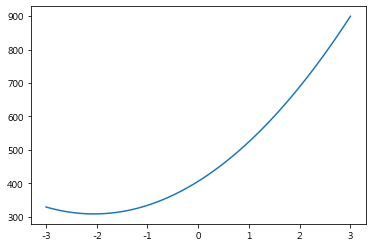

In [58]:
# f(x)=405.98*x1 + 95.09*x2 + 23.14*x3
plt.plot(x, f(to_matrix(x))) # 테스트 데이터를 이용하여 기울기 확인
plt.show()

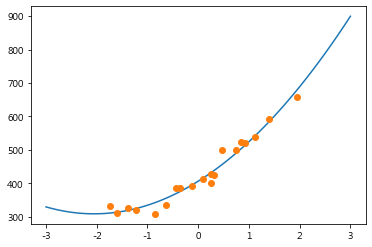

In [59]:
# f(x)=405.98*x1 + 95.09*x2 + 23.14*x3
plt.plot(x, f(to_matrix(x)))    # 테스트 데이터를 이용하여 기울기 확인
plt.plot(train_z, train_y, 'o') # click.csv 파일의 데이터
plt.show()